## Importing the Libraries, Loading and Cleaning the Data

In [30]:
# Importing all the necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

In [31]:
# Loading the Dataset
data = pd.read_csv(r"C:\Users\Shubham\credit.csv")
data

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,< 0 DM,6,critical,furniture/appliances,1169,unknown,> 7 years,4,4,67,none,own,2,skilled,1,yes,no
1,1 - 200 DM,48,good,furniture/appliances,5951,< 100 DM,1 - 4 years,2,2,22,none,own,1,skilled,1,no,yes
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 years,2,3,49,none,own,1,unskilled,2,no,no
3,< 0 DM,42,good,furniture/appliances,7882,< 100 DM,4 - 7 years,2,4,45,none,other,1,skilled,2,no,no
4,< 0 DM,24,poor,car,4870,< 100 DM,1 - 4 years,3,4,53,none,other,2,skilled,2,no,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,unknown,12,good,furniture/appliances,1736,< 100 DM,4 - 7 years,3,4,31,none,own,1,unskilled,1,no,no
996,< 0 DM,30,good,car,3857,< 100 DM,1 - 4 years,4,4,40,none,own,1,management,1,yes,no
997,unknown,12,good,furniture/appliances,804,< 100 DM,> 7 years,4,4,38,none,own,1,skilled,1,no,no
998,< 0 DM,45,good,furniture/appliances,1845,< 100 DM,1 - 4 years,4,4,23,none,other,1,skilled,1,yes,yes


In [32]:
# Checkiing for any missing values
missing_values = data.isnull().sum()
print(f"Missing Values:\n{missing_values}\n")

Missing Values:
checking_balance        0
months_loan_duration    0
credit_history          0
purpose                 0
amount                  0
savings_balance         0
employment_duration     0
percent_of_income       0
years_at_residence      0
age                     0
other_credit            0
housing                 0
existing_loans_count    0
job                     0
dependents              0
phone                   0
default                 0
dtype: int64



In [33]:
# Using Label encoding to convert categorical columns to numerical
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# Getting the summary statistics
print(f"Summary statistics of the dataset:\n{data.describe()}\n")

Summary statistics of the dataset:
       checking_balance  months_loan_duration  credit_history      purpose  \
count       1000.000000           1000.000000      1000.00000  1000.000000   
mean           1.582000             20.903000         1.07000     2.540000   
std            1.253334             12.058814         1.05935     1.607789   
min            0.000000              4.000000         0.00000     0.000000   
25%            0.000000             12.000000         0.00000     1.000000   
50%            1.000000             18.000000         1.00000     3.000000   
75%            3.000000             24.000000         1.00000     4.000000   
max            3.000000             72.000000         4.00000     5.000000   

             amount  savings_balance  employment_duration  percent_of_income  \
count   1000.000000        1000.0000          1000.000000        1000.000000   
mean    3271.258000           2.1450             1.525000           2.973000   
std     2822.736876   

## Manipulating, Wrangling and Visualizing the Data

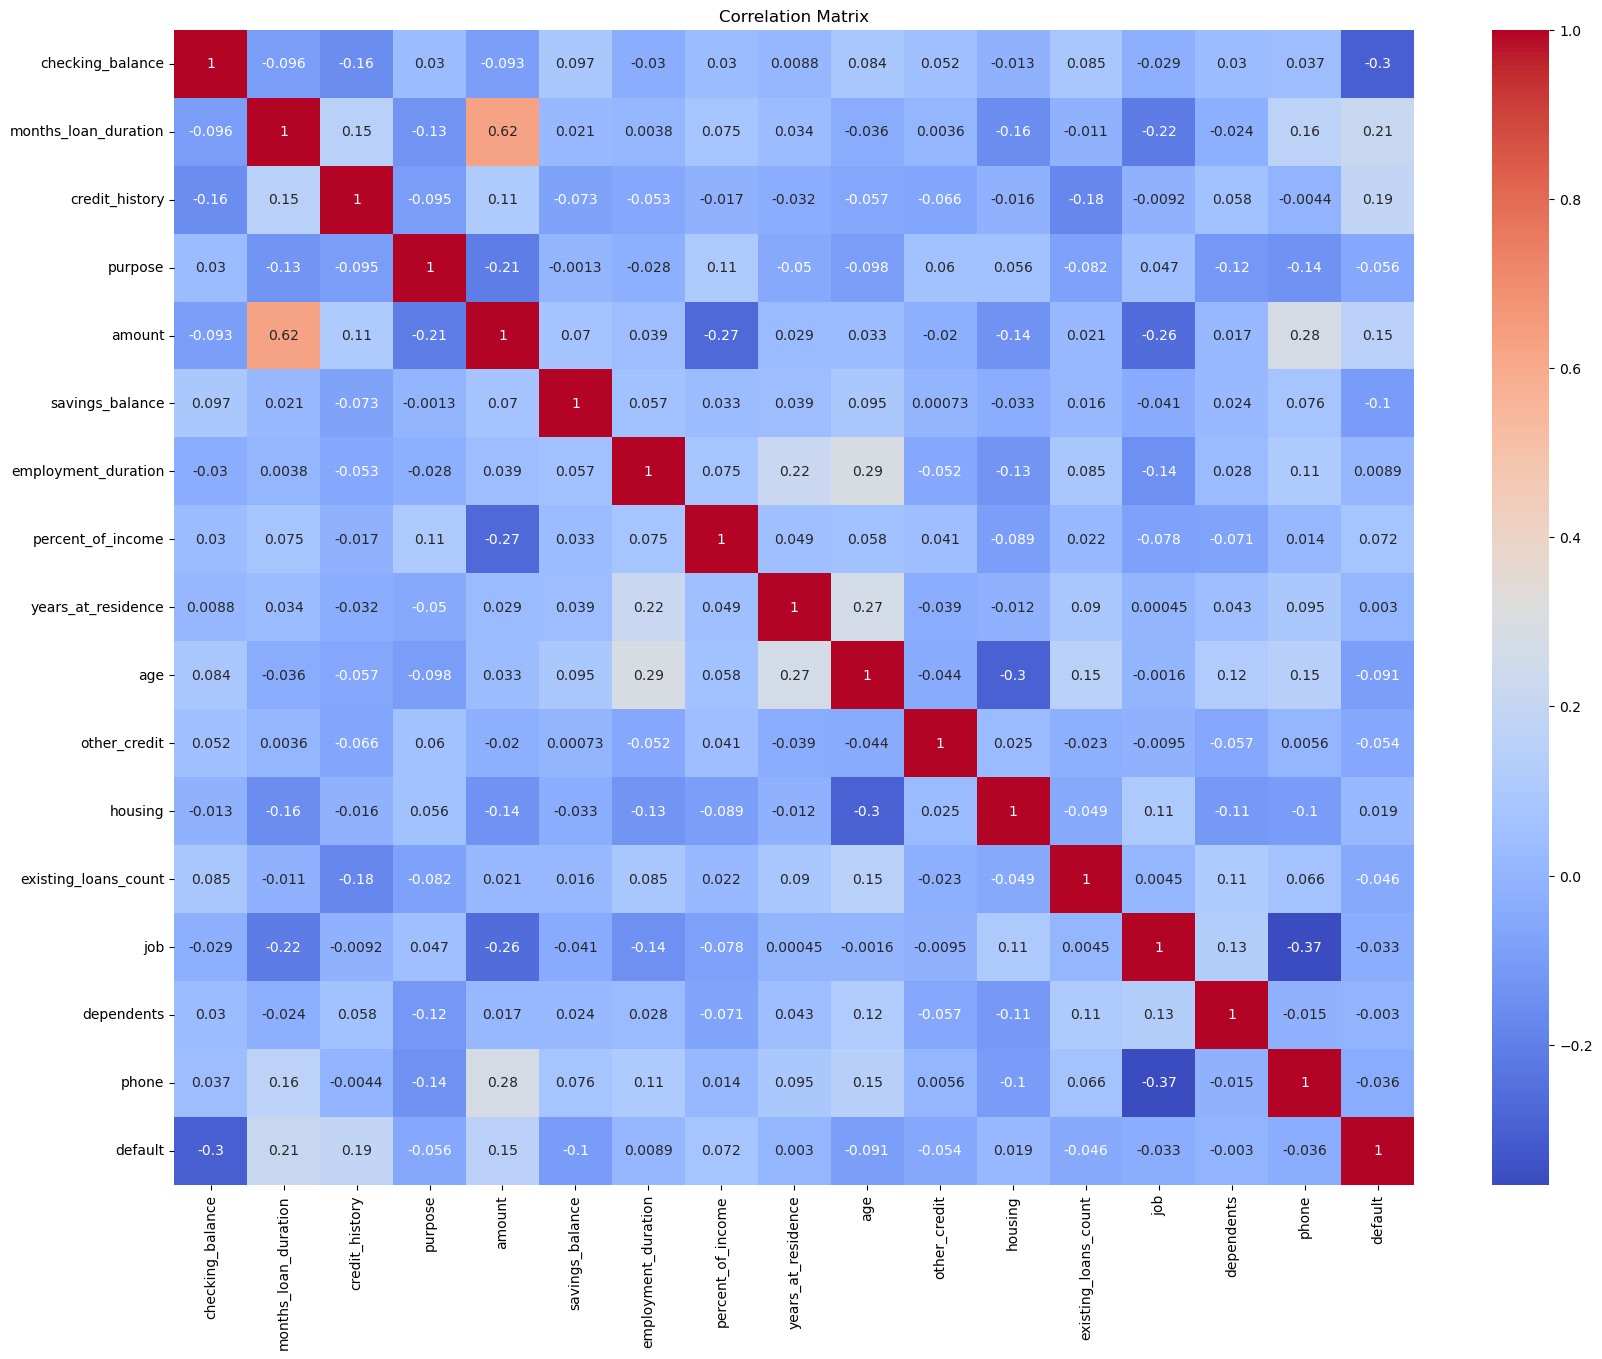

In [34]:
# Visualising relationships between features with correlation matrix and heatmap

plt.figure(figsize=(20, 15))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

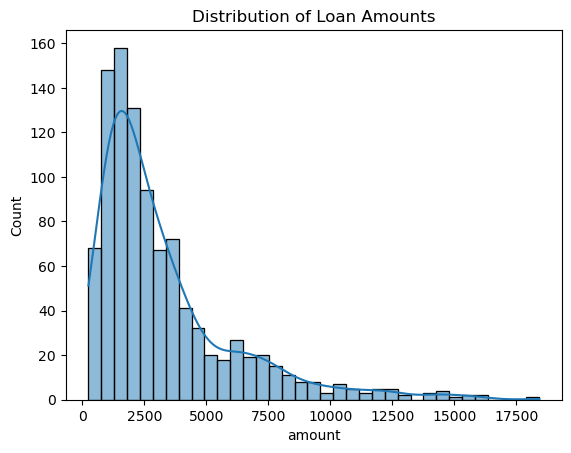

In [35]:
# Plotting Distribution of loan amounts
sns.histplot(data['amount'], kde=True)
plt.title('Distribution of Loan Amounts')
plt.show()

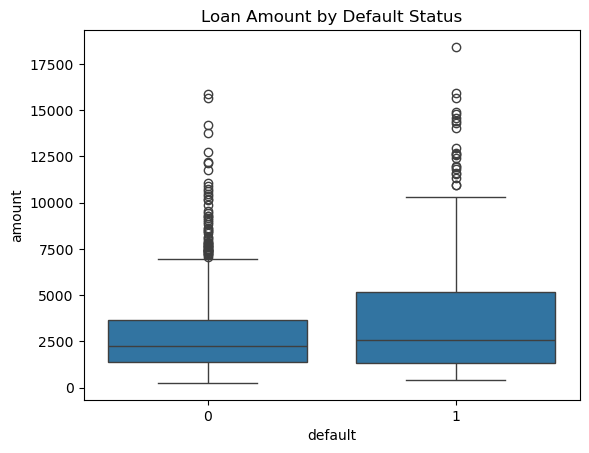

In [36]:
# Plotting Boxplot for categorical features vs. target variable
sns.boxplot(x='default', y='amount', data=data)
plt.title('Loan Amount by Default Status')
plt.show()

## Running Machine Learning Model

=== Logistic Regression ===
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.91      0.81       209
           1       0.54      0.24      0.33        91

    accuracy                           0.71       300
   macro avg       0.64      0.58      0.57       300
weighted avg       0.67      0.71      0.67       300



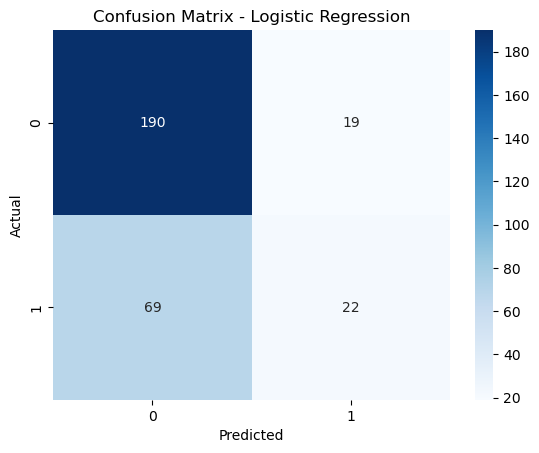

ROC AUC Score: 0.7353173142646827

=== Decision Tree ===
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.79      0.79       209
           1       0.52      0.51      0.51        91

    accuracy                           0.71       300
   macro avg       0.65      0.65      0.65       300
weighted avg       0.70      0.71      0.71       300



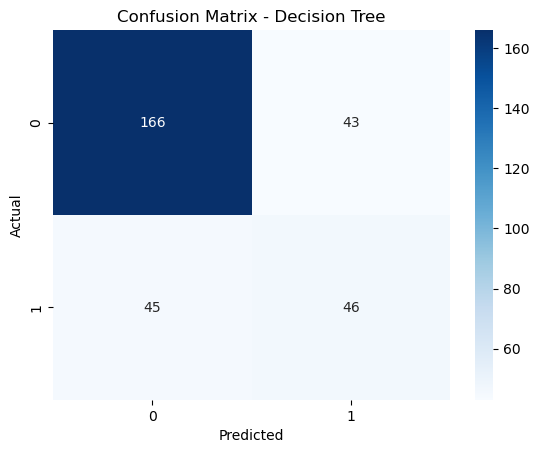

ROC AUC Score: 0.6498764393501235

=== Random Forest ===
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.92      0.84       209
           1       0.69      0.41      0.51        91

    accuracy                           0.76       300
   macro avg       0.73      0.66      0.68       300
weighted avg       0.75      0.76      0.74       300



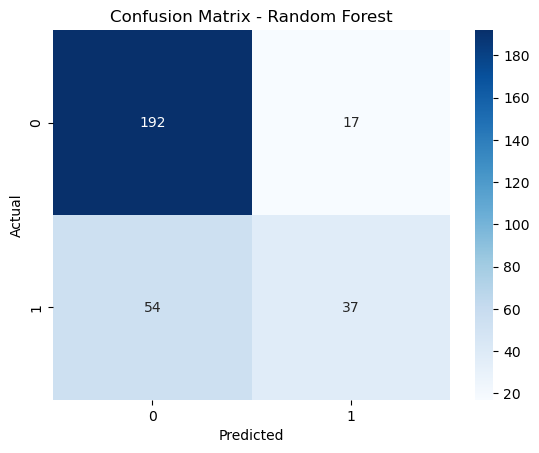

ROC AUC Score: 0.7804826752195173

=== Support Vector Machine ===
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.92      0.83       209
           1       0.61      0.30      0.40        91

    accuracy                           0.73       300
   macro avg       0.68      0.61      0.61       300
weighted avg       0.71      0.73      0.70       300



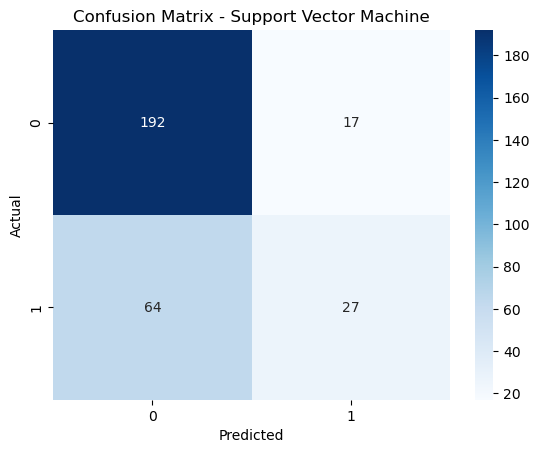

ROC AUC Score: 0.7438876912561122



In [37]:
# Feature scaling
scaler = StandardScaler()
X = data.drop('default', axis=1)
y = data['default']
X_scaled = scaler.fit_transform(X)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Initializing the models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(probability=True)
}

# Training, predicting, and evaluating the models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    
    print(f'=== {name} ===')
    print('Classification Report:')
    print(classification_report(y_test, y_pred))
    
    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    print(f'ROC AUC Score: {roc_auc_score(y_test, y_pred_prob)}\n')

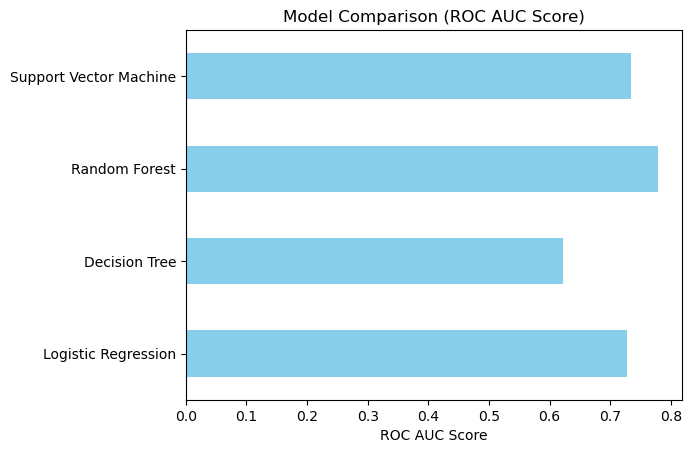

In [40]:
# Comparing the models using cross-validation

cv_scores = {}
for name, model in models.items():
    scores = cross_val_score(model, X_scaled, y, cv=5, scoring='roc_auc')
    cv_scores[name] = scores.mean()

# Displaying the cross-validation scores
cv_scores_df = pd.DataFrame.from_dict(cv_scores, orient='index', columns=['ROC AUC Score'])
cv_scores_df.plot(kind='barh', legend=False, color='skyblue')
plt.title('Model Comparison (ROC AUC Score)')
plt.xlabel('ROC AUC Score')
plt.show()